In [ ]:
#!pip install missingno

In [ ]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import missingno as msno
from scipy.stats import chi2_contingency
from tqdm import tqdm
import scipy.stats as st
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from itertools import combinations
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, auc, log_loss
from itertools import product
from collections import Counter
from sklearn.base import clone
from sklearn.metrics import accuracy_score, hamming_loss
from sklearn.utils import check_X_y, check_array
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict
import shap

## EDA

In [ ]:
full_df = pd.read_csv('OutputData/mental_health_full.csv')
full_df

,sitename,age,sex,grade,race4,race7,stheight,stweight,bmi,bmipct,...,q84,q85,q86,q87,qclose2people,qtransgender,state,gdp 2023,Unemployment Rate(Percent),Mean household income (dollars)
0,"Albuquerque, NM (AB)",NaN,NaN,1.0,3.0,4.0,1.677391,65.20692,23.086023,60.410003,...,3.0,4.0,1.0,7.0,3.0,NaN,New Mexico,"110,323,705",4.8%,"85,782"
1,"Albuquerque, NM (AB)",3.0,NaN,1.0,3.0,4.0,1.677391,65.20692,23.086023,60.410003,...,4.0,1.0,1.0,3.0,2.0,NaN,New Mexico,"110,323,705",4.8%,"85,782"
2,"Albuquerque, NM (AB)",3.0,NaN,1.0,NaN,NaN,1.677391,65.20692,23.086023,60.410003,...,1.0,6.0,1.0,1.0,1.0,NaN,New Mexico,"110,323,705",4.8%,"85,782"
3,"Albuquerque, NM (AB)",3.0,NaN,1.0,3.0,4.0,1.677391,65.20692,23.086023,60.410003,...,3.0,4.0,1.0,2.0,2.0,NaN,New Mexico,"110,323,705",4.8%,"85,782"
4,"Albuquerque, NM (AB)",3.0,NaN,1.0,3.0,4.0,1.677391,65.20692,23.086023,60.410003,...,4.0,4.0,1.0,2.0,3.0,NaN,New Mexico,"110,323,705",4.8%,"85,782"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16934,"Seattle, WA (SE)",7.0,1.0,4.0,3.0,4.0,1.630000,56.70000,21.340000,49.070000,...,5.0,2.0,1.0,2.0,5.0,1.0,Washington,"985,765",4.5%,"129,161"
16935,"Seattle, WA (SE)",7.0,1.0,4.0,2.0,3.0,1.730000,54.43000,18.180000,8.890000,...,2.0,2.0,1.0,1.0,4.0,1.0,Washington,"985,765",4.5%,"129,161"
16936,"Seattle, WA (SE)",7.0,1.0,4.0,NaN,NaN,1.730000,64.41000,21.520000,51.340000,...,4.0,4.0,1.0,1.0,1.0,1.0,Washington,"985,765",4.5%,"129,161"
16937,"Seattle, WA (SE)",7.0,1.0,4.0,1.0,6.0,1.570000,52.16000,21.160000,46.750000,...,5.0,4.0,1.0,1.0,2.0,3.0,Washington,"985,765",4.5%,"129,161"


Shape of dataset: (16939, 97)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16939 entries, 0 to 16938
Data columns (total 97 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   sitename                         16939 non-null  object 
 1   age                              16913 non-null  float64
 2   sex                              16833 non-null  float64
 3   grade                            16832 non-null  float64
 4   race4                            16636 non-null  float64
 5   race7                            16472 non-null  float64
 6   stheight                         16939 non-null  float64
 7   stweight                         16939 non-null  float64
 8   bmi                              16939 non-null  float64
 9   bmipct                           16939 non-null  float64
 10  qnobese                          14700 non-null  float64
 11  qnowt                            14700 non-

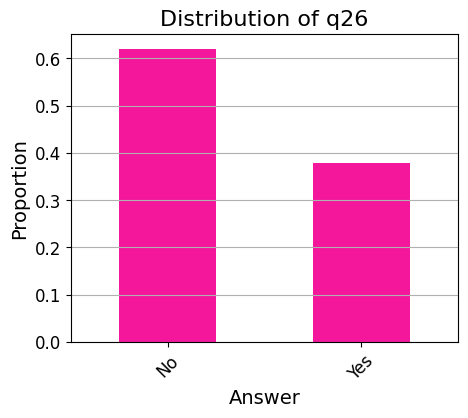

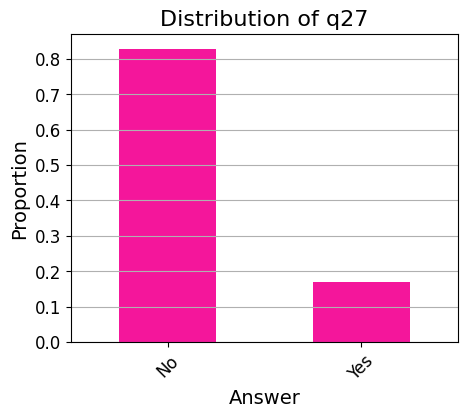

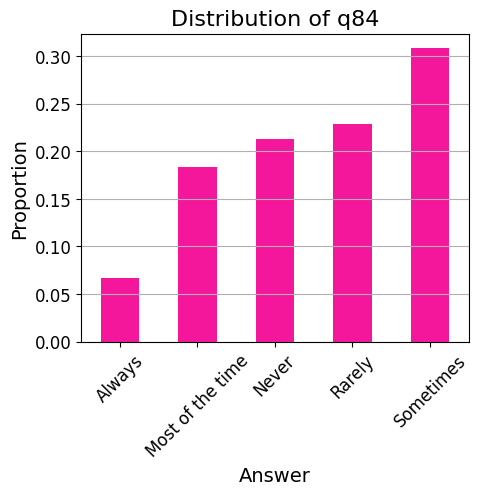

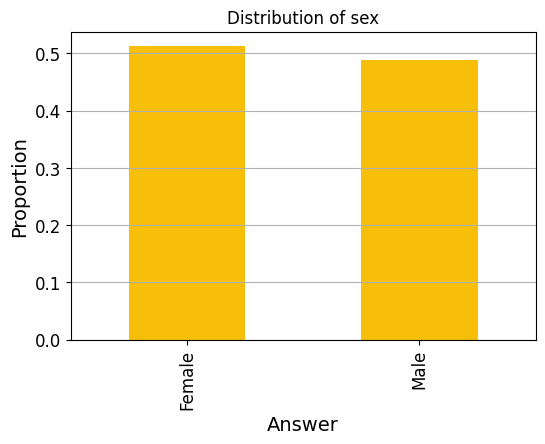

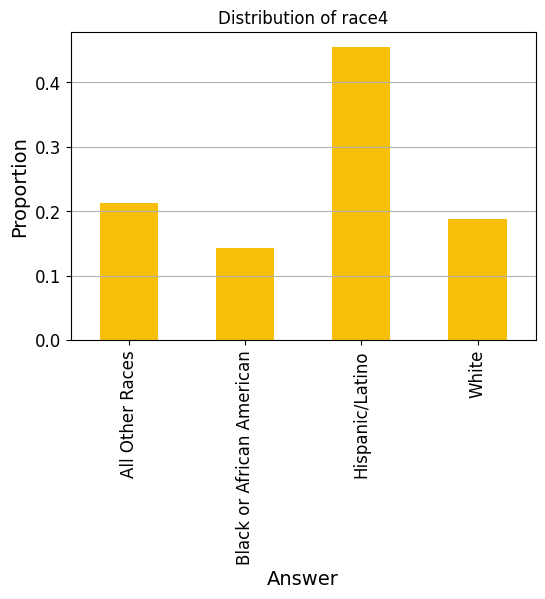

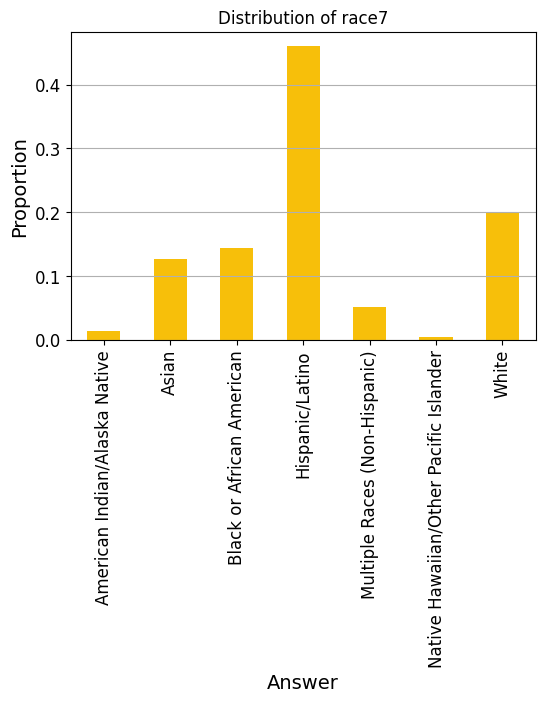

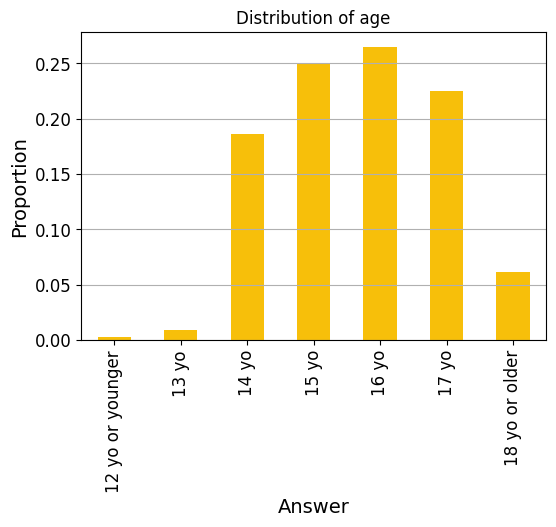

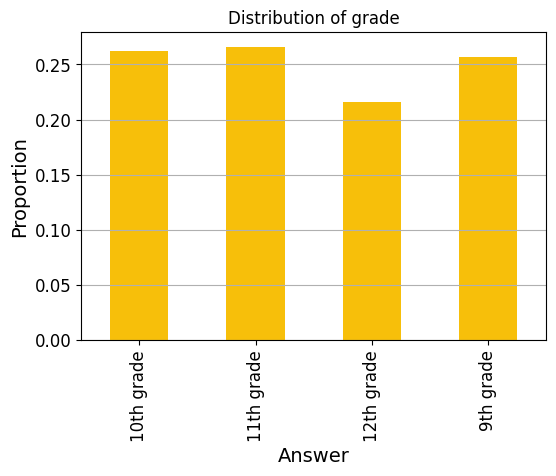

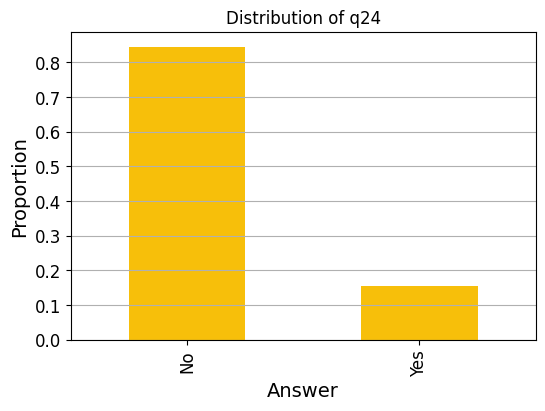

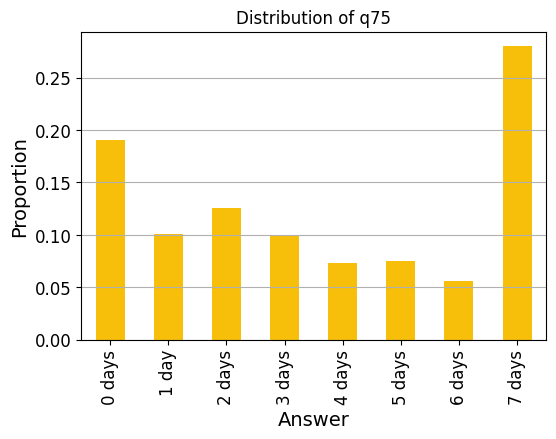

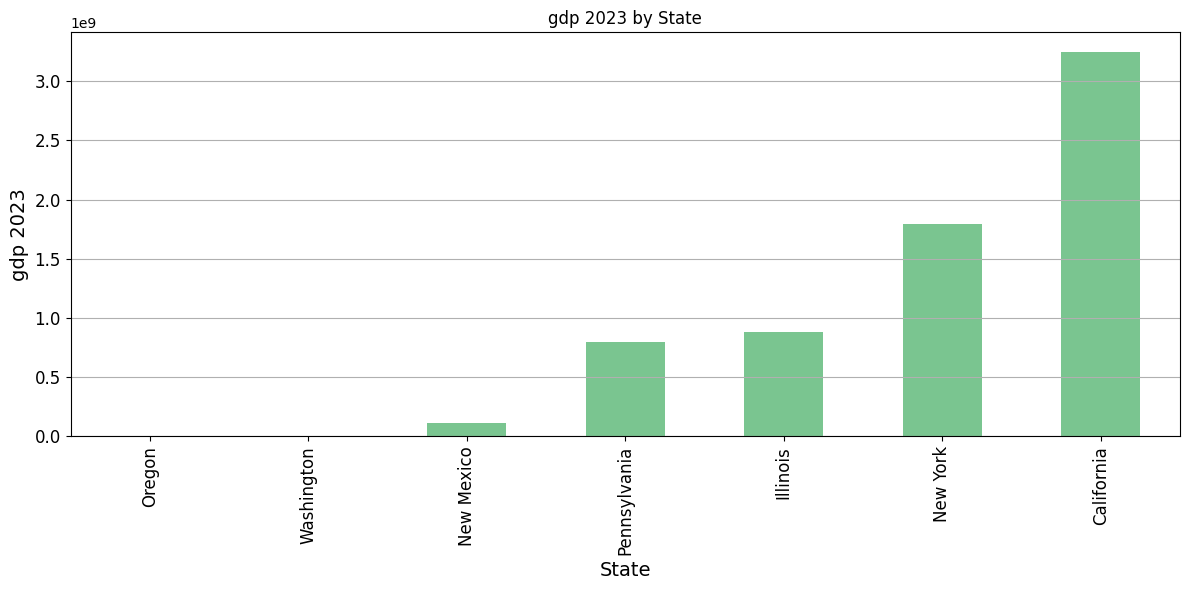

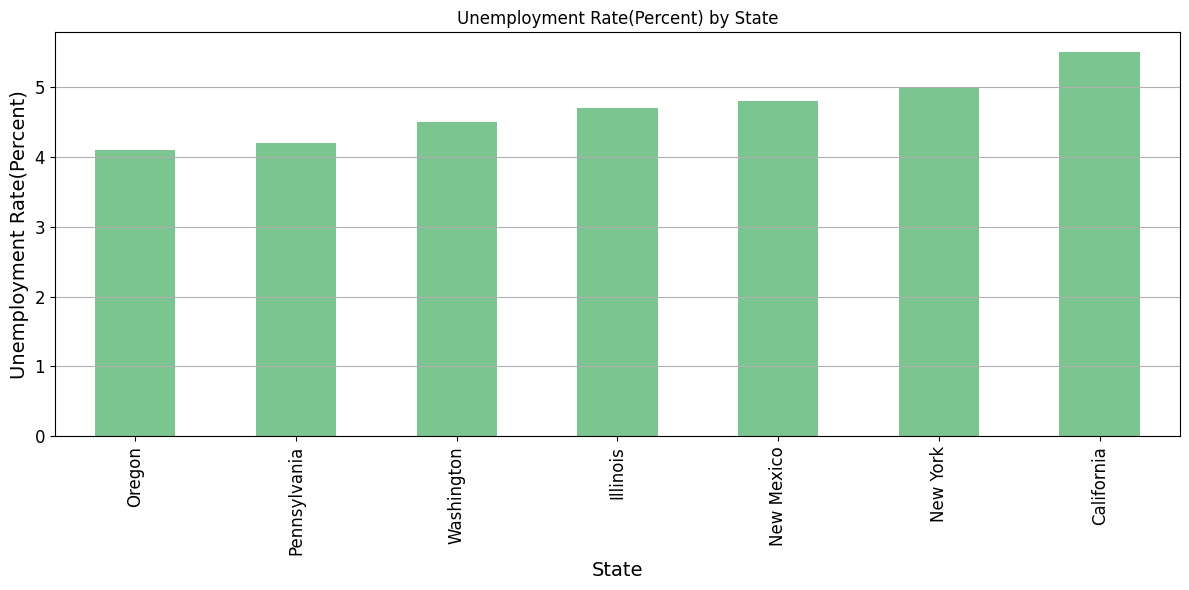

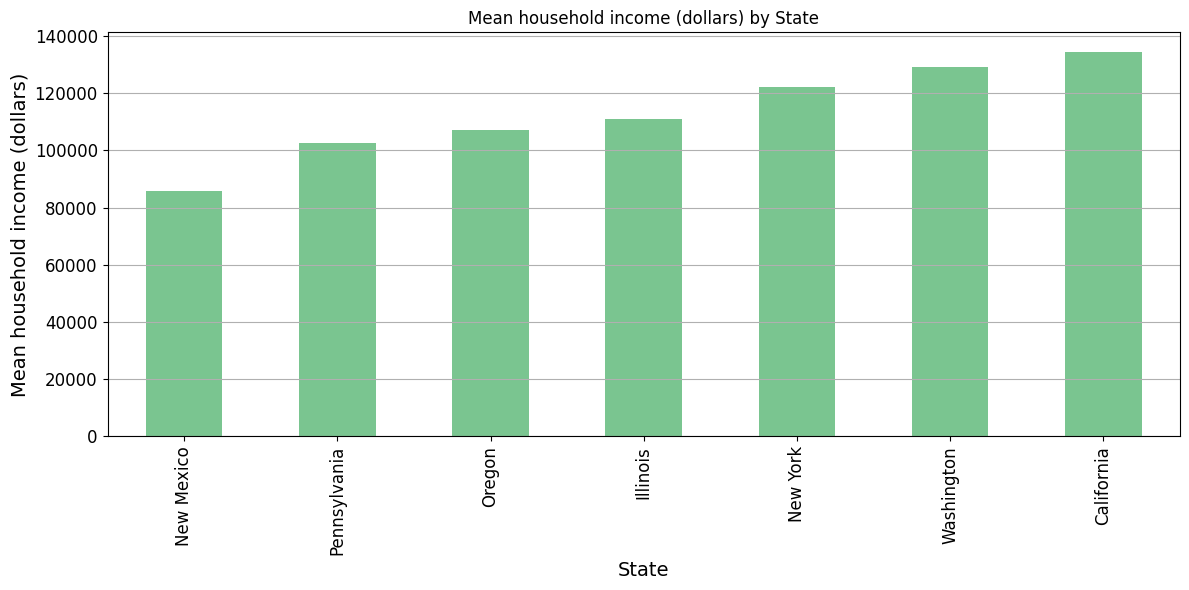

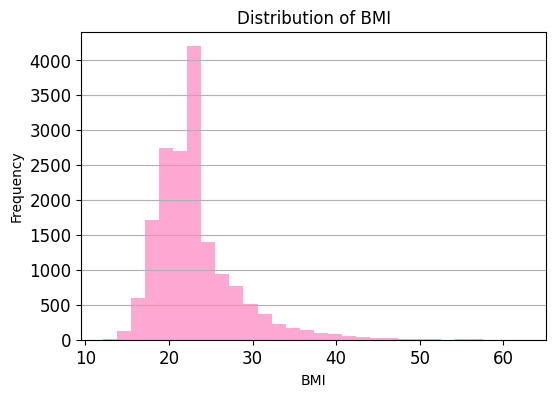

In [ ]:
# --- Basic Info ---
print("Shape of dataset:", full_df.shape)
print("\nInfo:")
print(full_df.info())
print("\nSummary statistics:")
print(full_df.describe())

# --- Missing Values ---
print("\nMissing values (sorted):")
missing_percent = full_df.isnull().mean() * 100
print(missing_percent[missing_percent > 0].sort_values(ascending=False))

# --- Mapping dictionaries for key categorical variables ---
mapping_dicts = {
    'q26': {1: 'Yes', 2: 'No'},
    'q27': {1: 'Yes', 2: 'No'},
    'q84': {
        1: 'Never',
        2: 'Rarely',
        3: 'Sometimes',
        4: 'Most of the time',
        5: 'Always'
    },
    'age': {
        1: '12 yo or younger',
        2: '13 yo',
        3: '14 yo',
        4: '15 yo',
        5: '16 yo',
        6: '17 yo',
        7: '18 yo or older'
    },
    'sex': {
        1: 'Female',
        2: 'Male'
    },
    'grade': {
        1: '9th grade',
        2: '10th grade',
        3: '11th grade',
        4: '12th grade',
        5: 'Ungraded or other grade'
    },
    'race4': {
        1: 'White',
        2: 'Black or African American',
        3: 'Hispanic/Latino',
        4: 'All Other Races'
    },
    'race7': {
        1: 'American Indian/Alaska Native',
        2: 'Asian',
        3: 'Black or African American',
        4: 'Hispanic/Latino',
        5: 'Native Hawaiian/Other Pacific Islander',
        6: 'White',
        7: 'Multiple Races (Non-Hispanic)'
    },
    'q24': {
        1: 'Yes',
        2: 'No'
    },
      'q75': {
        1: '0 days',
        2: '1 day',
        3: '2 days',
        4: '3 days',
        5: '4 days',
        6: '5 days',
        7: '6 days',
        8: '7 days'
    }
}

# --- Targets Distribution ---
target_vars = ['q26', 'q27', 'q84']

for target in target_vars:
    if target in full_df.columns:
        if target in mapping_dicts:
            mapped_series = full_df[target].map(mapping_dicts[target])
        else:
            mapped_series = full_df[target]

        if mapped_series.dropna().shape[0] > 0:
            plt.figure(figsize=(5, 4))
            mapped_series.value_counts(normalize=True).sort_index().plot(kind='bar', color='#f4169b')
            plt.title(f'Distribution of {target}', fontsize=16)
            plt.xlabel('Answer', fontsize=14)
            plt.ylabel('Proportion', fontsize=14)
            plt.xticks(fontsize=12)
            plt.yticks(fontsize=12)
            plt.xticks(rotation=45)
            plt.grid(axis='y')
            plt.show()
        else:
            print(f"Warning: {target} exists but has no non-missing values. Skipping plot.")
    else:
        print(f"Warning: {target} not found in dataset. Skipping plot.")

# --- Additional Categorical Variables Distribution ---
categorical_vars = ['sex', 'race4', 'race7', 'age', 'grade', 'q24', 'q75']

for var in categorical_vars:
    if var in full_df.columns:
        if var in mapping_dicts:
            mapped_series = full_df[var].map(mapping_dicts[var])
        else:
            mapped_series = full_df[var]

        if mapped_series.dropna().shape[0] > 0:
            plt.figure(figsize=(6, 4))
            mapped_series.value_counts(normalize=True).sort_index().plot(kind='bar', color='#f7bf0a')
            plt.title(f'Distribution of {var}')
            plt.xlabel('Answer', fontsize=14)
            plt.ylabel('Proportion', fontsize=14)
            plt.xticks(fontsize=12)
            plt.yticks(fontsize=12)
            plt.xticks(rotation=90)
            plt.grid(axis='y')
            plt.show()
        else:
            print(f"Warning: {var} exists but has no non-missing values. Skipping plot.")
    else:
        print(f"Warning: {var} not found in dataset. Skipping plot.")


# Clean the numeric columns if they contain commas or percentage signs (only run once)
full_df['gdp 2023'] = full_df['gdp 2023'].astype(str).str.replace(',', '').astype(float)
full_df['Unemployment Rate(Percent)'] = full_df['Unemployment Rate(Percent)'].astype(str).str.replace('%', '').astype(float)
full_df['Mean household income (dollars)'] = full_df['Mean household income (dollars)'].astype(str).str.replace(',', '').astype(float)

# Columns to plot
columns_to_plot = ['gdp 2023', 'Unemployment Rate(Percent)', 'Mean household income (dollars)']

# Plot each variable
for column in columns_to_plot:
    plt.figure(figsize=(12, 6))
    full_df.groupby('state')[column].mean().sort_values().plot(kind='bar', color='#7ac590')
    plt.title(f"{column} by State")
    plt.xlabel("State", fontsize=14)
    plt.ylabel(column, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.grid(axis='y')
    plt.show()


# --- Histogram for BMI ---
if 'bmi' in full_df.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(full_df['bmi'].dropna(), bins=30, color='#ffa8d3')
    plt.title('Distribution of BMI')
    plt.xlabel('BMI')
    plt.ylabel('Frequency')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y')
    plt.show()
else:
    print("Feature 'bmi' not found.")


## Outliers

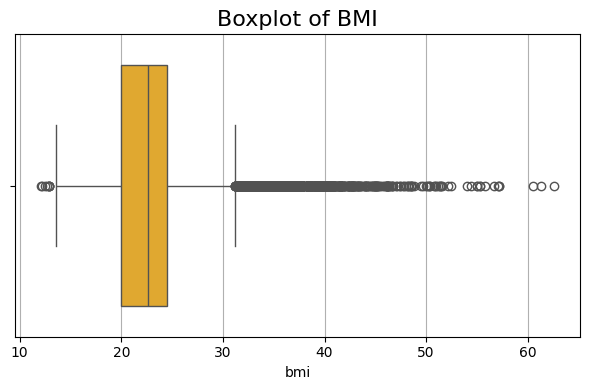

Number of BMI outliers: 1124 (6.64%)


In [ ]:
# --- 1. Visualize BMI with a boxplot ---
plt.figure(figsize=(6, 4))
sns.boxplot(data=full_df, x='bmi', color='#feb312')
plt.title('Boxplot of BMI', fontsize=16)
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# --- 2. Detect outliers using IQR ---
Q1 = full_df['bmi'].quantile(0.25)
Q3 = full_df['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Boolean mask of outliers
bmi_outliers = (full_df['bmi'] < lower_bound) | (full_df['bmi'] > upper_bound)

# Print outlier count
outlier_count = bmi_outliers.sum()
print(f"Number of BMI outliers: {outlier_count} ({round(100 * outlier_count / len(full_df), 2)}%)")

In [ ]:
# Prepare contingency table for q27 by BMI outlier status
# First, re-calculate IQR outlier flag for BMI
Q1 = full_df['bmi'].quantile(0.25)
Q3 = full_df['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
full_df['bmi_outlier'] = full_df['bmi'].apply(lambda x: 'Outlier' if x < lower_bound or x > upper_bound else 'Normal')

# Prepare the contingency table (drop missing q27 values)
contingency = pd.crosstab(full_df['bmi_outlier'], full_df['q27'])

# Run chi-square test
chi2, p, dof, expected = st.chi2_contingency(contingency)
print(f"Chi² = {chi2:.2f}")
print(f"p-value = {p:.4f}")
print("Result: Significant association" if p < 0.05 else "Result: Not significant")

Chi² = 5.05
p-value = 0.0246
Result: Significant association


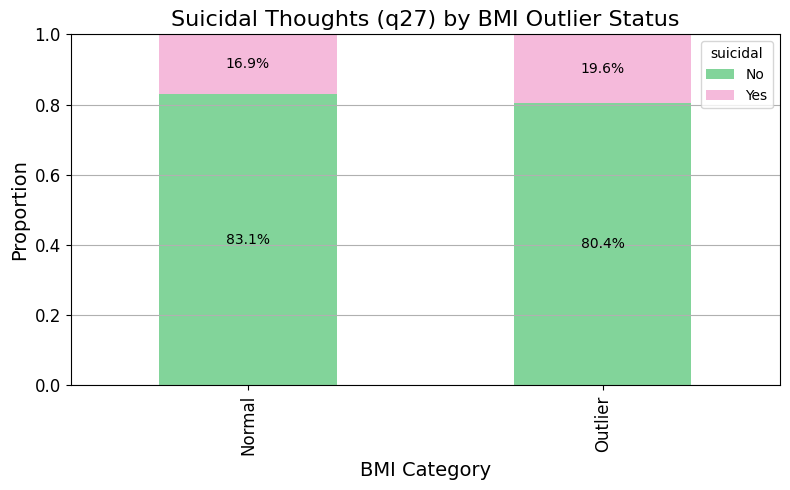

In [ ]:
# Prepare data
suicide_map = {1: 'Yes', 2: 'No'}
temp = full_df[['bmi_outlier', 'q27']].copy()
temp['suicidal'] = temp['q27'].map(suicide_map)
temp.dropna(inplace=True)

# Calculate proportions
suicide_rate = pd.crosstab(temp['bmi_outlier'], temp['suicidal'], normalize='index')

colors = ['#82d49a', '#f5badb']

# Plot
ax = suicide_rate.plot(kind='bar', stacked=True, figsize=(8, 5), color=colors)
plt.title('Suicidal Thoughts (q27) by BMI Outlier Status', fontsize=16)
plt.xlabel('BMI Category', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()

# Add percentage labels
for i, bars in enumerate(ax.containers):
    for bar in bars:
        height = bar.get_height()
        if height > 0.01:  # skip very small bars
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f"{height:.1%}",
                ha='center',
                va='center',
                fontsize=10,
                color='black'
            )

plt.show()


## Bivariate/Multivariate Analysis

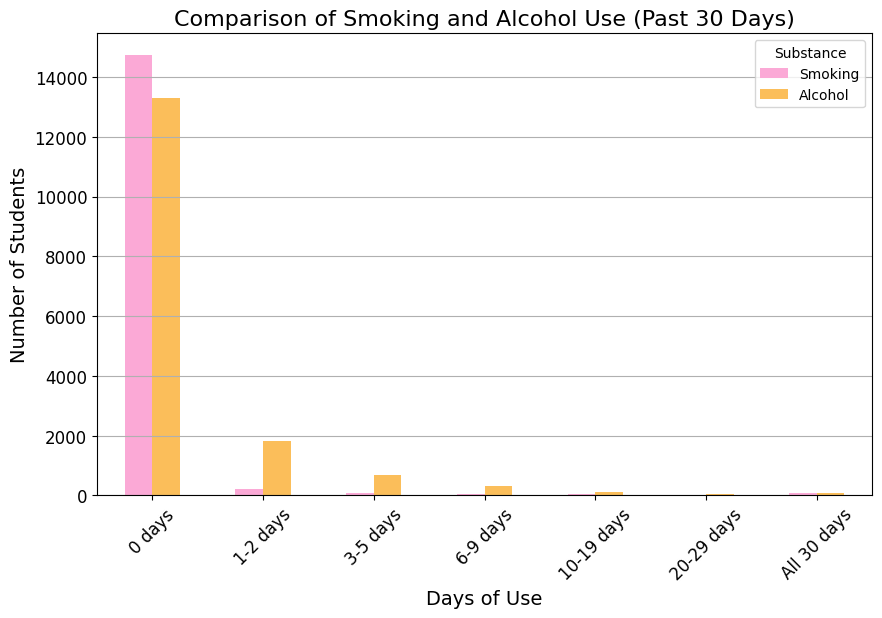

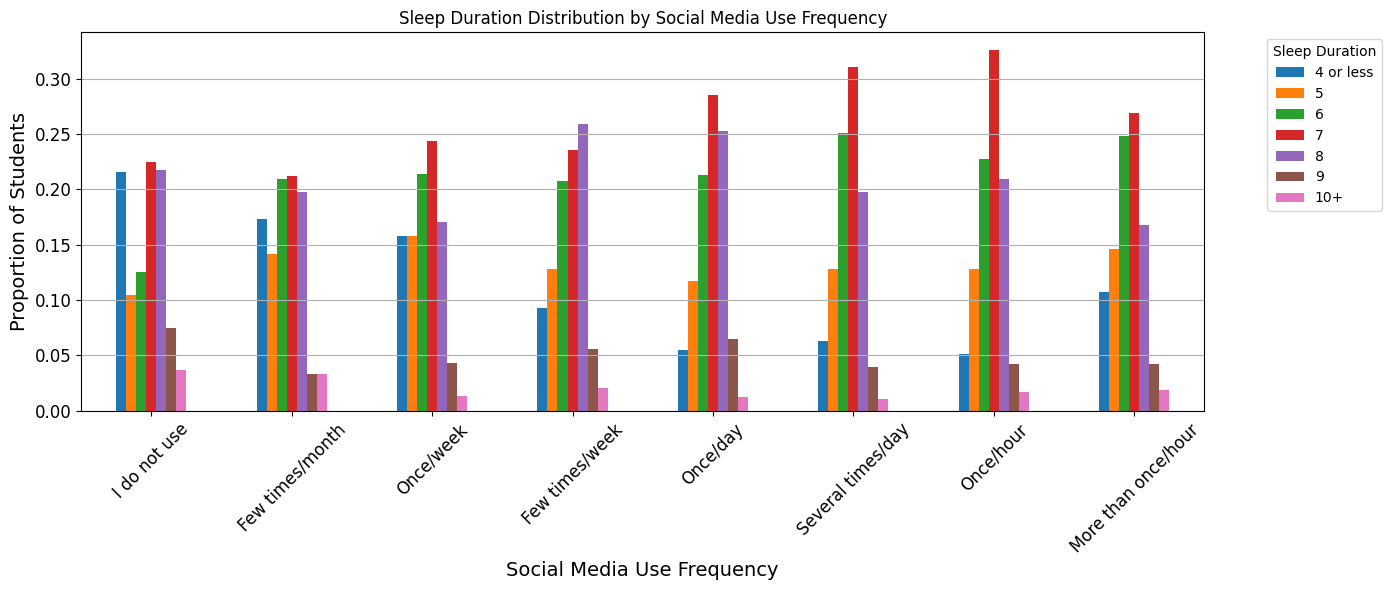

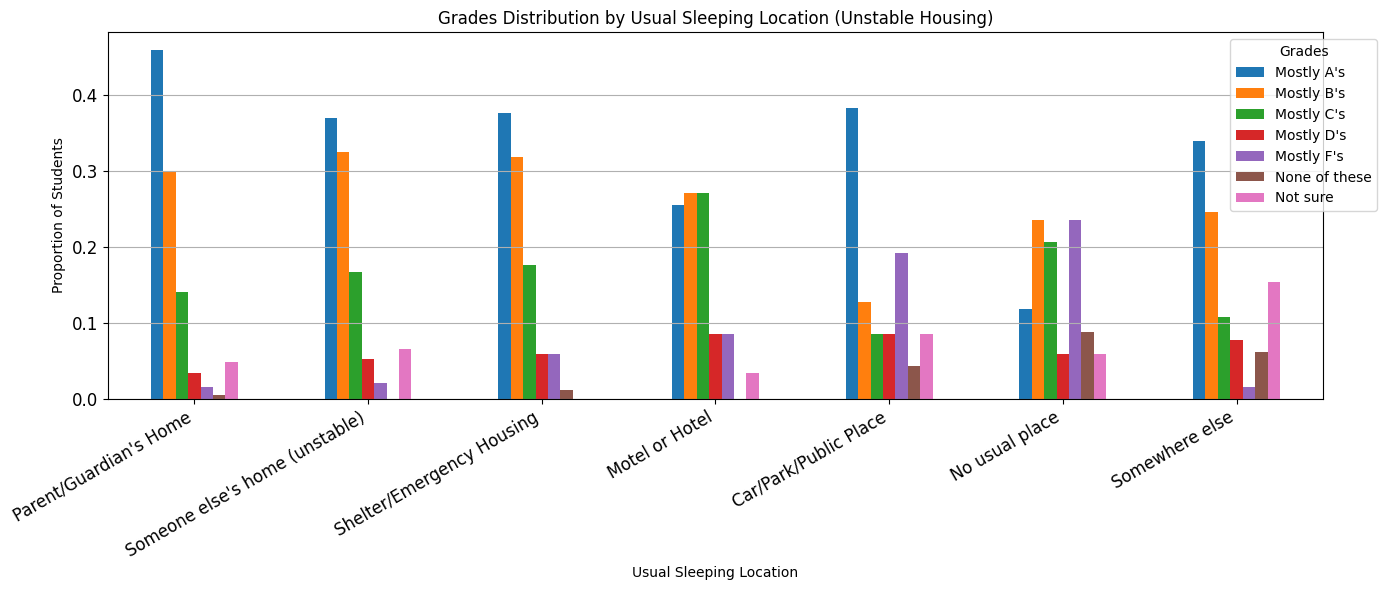

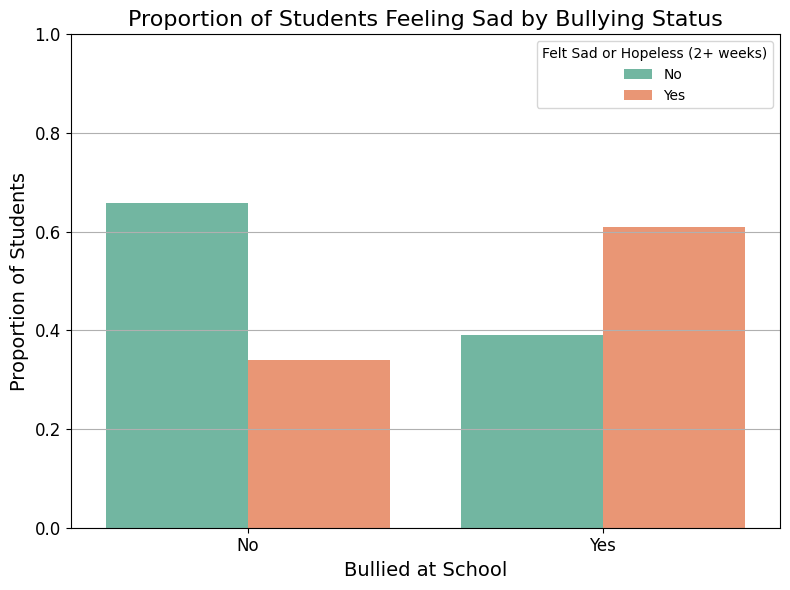

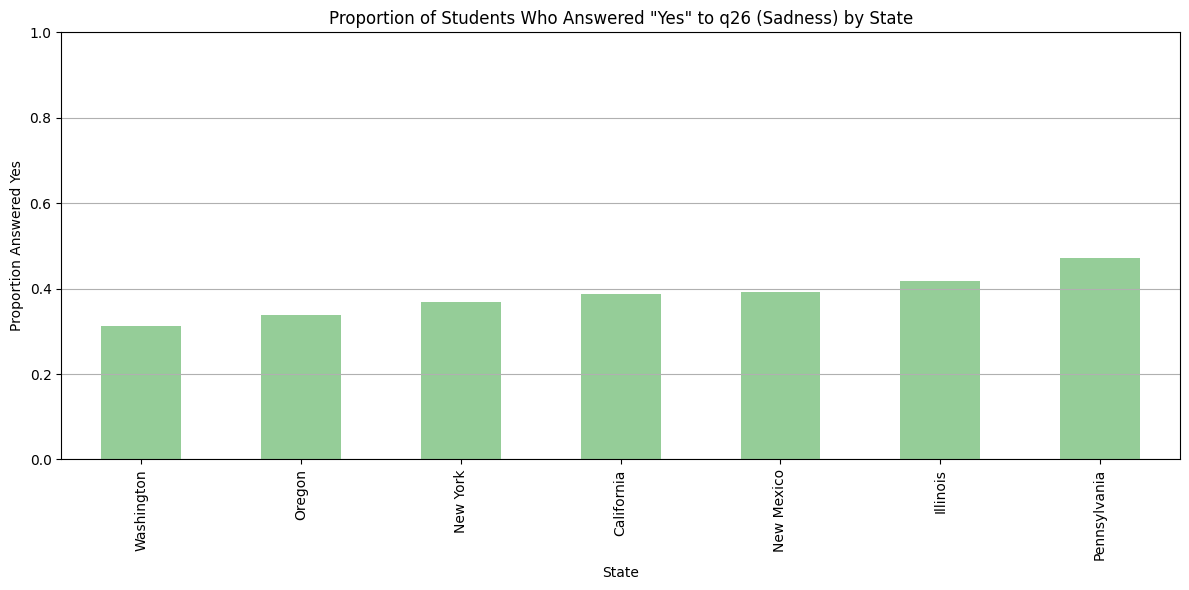

In [ ]:
# --- Mapping dictionary ---
smoking_drinking_mapping = {
    1: '0 days',
    2: '1-2 days',
    3: '3-5 days',
    4: '6-9 days',
    5: '10-19 days',
    6: '20-29 days',
    7: 'All 30 days'
}

# --- Map temporarily ---
q33_mapped = full_df['q33'].map(smoking_drinking_mapping)
q42_mapped = full_df['q42'].map(smoking_drinking_mapping)

# --- Calculate counts ---
smoking_counts = q33_mapped.value_counts().reindex(smoking_drinking_mapping.values(), fill_value=0)
alcohol_counts = q42_mapped.value_counts().reindex(smoking_drinking_mapping.values(), fill_value=0)

# --- Create dataframe ---
counts_df = pd.DataFrame({
    'Smoking': smoking_counts,
    'Alcohol': alcohol_counts
}, index=smoking_drinking_mapping.values())

colors1 = ['#fba9d6', '#fbbe5a']

# --- Plot Grouped Bar Plot ---
counts_df.plot(kind='bar', figsize=(10,6), color=colors1)
plt.title('Comparison of Smoking and Alcohol Use (Past 30 Days)', fontsize=16)
plt.xlabel('Days of Use', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Substance')
plt.grid(axis='y')
plt.show()

# --- Define mappings ---
social_media_mapping = {
    1: 'I do not use',
    2: 'Few times/month',
    3: 'Once/week',
    4: 'Few times/week',
    5: 'Once/day',
    6: 'Several times/day',
    7: 'Once/hour',
    8: 'More than once/hour'
}

sleep_mapping = {
    1: '4 or less',
    2: '5',
    3: '6',
    4: '7',
    5: '8',
    6: '9',
    7: '10+'
}

# --- Temporary dataframe ---
df_temp = full_df[['q80', 'q85']].copy()
df_temp['social_media'] = df_temp['q80'].map(social_media_mapping)
df_temp['sleep'] = df_temp['q85'].map(sleep_mapping)
df_temp.dropna(inplace=True)

# --- Define proper category orders ---
social_order = list(social_media_mapping.values())
sleep_order = list(sleep_mapping.values())

# --- Create cross-tabulation ---
cross_tab = pd.crosstab(df_temp['social_media'], df_temp['sleep'], normalize='index')
cross_tab = cross_tab.reindex(index=social_order, columns=sleep_order)

# --- Plot grouped bar chart ---
cross_tab.plot(kind='bar', figsize=(14,6))
plt.title('Sleep Duration Distribution by Social Media Use Frequency')
plt.xlabel('Social Media Use Frequency', fontsize=14)
plt.ylabel('Proportion of Students', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Sleep Duration', bbox_to_anchor=(1.05, 1))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# --- Mapping dictionaries ---
grades_mapping = {
    1: "Mostly A's",
    2: "Mostly B's",
    3: "Mostly C's",
    4: "Mostly D's",
    5: "Mostly F's",
    6: "None of these",
    7: "Not sure"
}

housing_mapping = {
    1: "Parent/Guardian's Home",
    2: "Someone else's home (unstable)",
    3: "Shelter/Emergency Housing",
    4: "Motel or Hotel",
    5: "Car/Park/Public Place",
    6: "No usual place",
    7: "Somewhere else"
}

# --- Map variables ---
df_temp = full_df[['q87', 'q86']].copy()
df_temp['grades'] = df_temp['q87'].map(grades_mapping)
df_temp['housing'] = df_temp['q86'].map(housing_mapping)
df_temp.dropna(inplace=True)

# --- Define display order ---
grade_order = list(grades_mapping.values())
housing_order = list(housing_mapping.values())

# --- Cross-tabulation normalized by row ---
cross_tab = pd.crosstab(df_temp['housing'], df_temp['grades'], normalize='index')
cross_tab = cross_tab[grade_order]
cross_tab = cross_tab.reindex(housing_order)

# --- Plot ---
cross_tab.plot(kind='bar', figsize=(14,6))
plt.title('Grades Distribution by Usual Sleeping Location (Unstable Housing)')
plt.xlabel('Usual Sleeping Location')
plt.ylabel('Proportion of Students')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.legend(title='Grades', bbox_to_anchor=(1.05, 1))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# --- Mapping ---
bullying_mapping = {1: 'Yes', 2: 'No'}
sadness_mapping = {1: 'Yes', 2: 'No'}

# --- Prepare Data ---
df_temp = full_df[['q24', 'q26']].copy()
df_temp['bullied'] = df_temp['q24'].map(bullying_mapping)
df_temp['sad'] = df_temp['q26'].map(sadness_mapping)
df_temp.dropna(inplace=True)

# --- Count and Normalize ---
grouped = df_temp.groupby(['bullied', 'sad']).size().reset_index(name='count')
grouped['proportion'] = grouped.groupby('bullied')['count'].transform(lambda x: x / x.sum())

# --- Plot Grouped Bar Chart ---
plt.figure(figsize=(8, 6))
sns.barplot(data=grouped, x='bullied', y='proportion', hue='sad', palette='Set2')
plt.title('Proportion of Students Feeling Sad by Bullying Status', fontsize=16)
plt.xlabel('Bullied at School', fontsize=14)
plt.ylabel('Proportion of Students', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Felt Sad or Hopeless (2+ weeks)')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Step 1: Filter out rows with missing or invalid q26/state
filtered_df = full_df[(full_df['q26'].isin([1, 2])) & (full_df['state'].notnull())]

# Step 2: Calculate proportion of "Yes" answers per state
yes_proportion = (
    filtered_df.groupby('state')['q26']
    .apply(lambda x: (x == 1).mean())
    .sort_values()
)

# Step 3: Plot the result
plt.figure(figsize=(12, 6))
yes_proportion.plot(kind='bar', color='#95cd98')
plt.title('Proportion of Students Who Answered "Yes" to q26 (Sadness) by State')
plt.xlabel('State')
plt.ylabel('Proportion Answered Yes')
plt.xticks(rotation=90)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


/tmp/ipython-input-44-3124143233.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('hot')  # or any sequential map like 'viridis', 'Blues', etc.


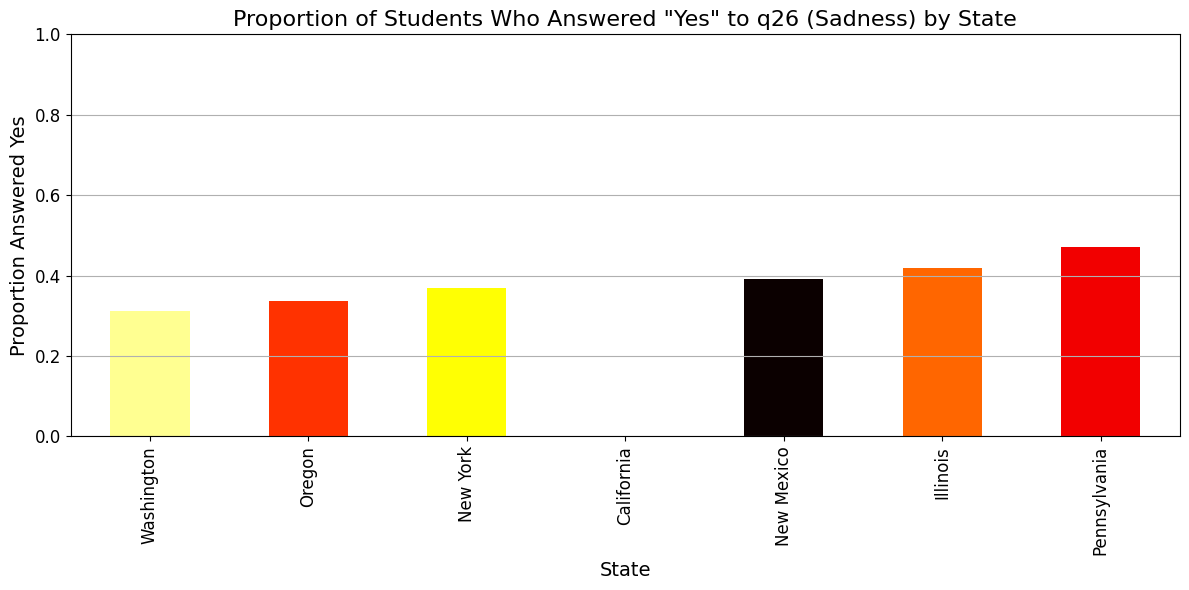

In [ ]:
# Step 1: Filter out rows with missing or invalid q26/state
filtered_df = full_df[(full_df['q26'].isin([1, 2])) & (full_df['state'].notnull())]

# Step 2: Calculate proportion of "Yes" answers per state
yes_proportion = (
    filtered_df.groupby('state')['q26']
    .apply(lambda x: (x == 1).mean())
    .sort_values()
)

# Step 3: Get average income per state (in same order as yes_proportion)
income_by_state = (
    filtered_df.groupby('state')['Mean household income (dollars)']
    .mean()
)
income_by_state = income_by_state.loc[yes_proportion.index]  # align with sorted states

# Step 4: Create sequential color scale from income
norm = mcolors.Normalize(vmin=income_by_state.min(), vmax=income_by_state.max())
cmap = cm.get_cmap('hot')  # or any sequential map like 'viridis', 'Blues', etc.
bar_colors = [cmap(norm(val)) for val in income_by_state]

# Step 5: Plot the result
plt.figure(figsize=(12, 6))
yes_proportion.plot(kind='bar', color=bar_colors)
plt.title('Proportion of Students Who Answered "Yes" to q26 (Sadness) by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Proportion Answered Yes', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Identifying Redundant Categorical Variables Using Cramer's V

In [ ]:
target_col = 'q26'
numeric_vars = ['stheight', 'stweight', 'bmi', 'bmipct', 'gdp 2023', 'Unemployment Rate(Percent)', 'Mean household income (dollars)']
nonrelevant_vars = ['q27', 'q84', 'record', 'sitename', 'state']
cat_vars = [col for col in full_df.columns if col not in numeric_vars and col != target_col and col not in nonrelevant_vars]

# Function to compute Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    if confusion_matrix.shape[0] < 2 or confusion_matrix.shape[1] < 2:
        return np.nan
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Threshold for redundancy
threshold = 0.85
results = []

# Compute and store results
for col1, col2 in tqdm(combinations(cat_vars, 2), total=(len(cat_vars)*(len(cat_vars)-1))//2):
    v = cramers_v(full_df[col1], full_df[col2])
    if v is not None and v > threshold:
        results.append((col1, col2, v))

# Sort results by Cramer's V descending
results_sorted = sorted(results, key=lambda x: x[2], reverse=True)

# Display
print("\nHighly correlated categorical pairs (Cramer's V > 0.85):\n")
for col1, col2, v in results_sorted:
    print(f"{col1} ↔ {col2} : Cramer's V = {v:.3f}")


100%|██████████| 3655/3655 [00:29<00:00, 124.78it/s]


Highly correlated categorical pairs (Cramer's V > 0.85):

q65 ↔ transg : Cramer's V = 1.000
q65 ↔ qtransgender : Cramer's V = 1.000
q64 ↔ sexid : Cramer's V = 1.000
transg ↔ qtransgender : Cramer's V = 1.000
sexpart ↔ sexpart2 : Cramer's V = 1.000
q56 ↔ q60 : Cramer's V = 1.000
q56 ↔ q61 : Cramer's V = 1.000
q64 ↔ sexid2 : Cramer's V = 1.000
sexid ↔ sexid2 : Cramer's V = 1.000
q56 ↔ q58 : Cramer's V = 1.000
q31 ↔ q32 : Cramer's V = 1.000
q56 ↔ q57 : Cramer's V = 1.000
q56 ↔ q59 : Cramer's V = 1.000
sexid2 ↔ sextrans : Cramer's V = 0.991
sexid ↔ sextrans : Cramer's V = 0.991
q64 ↔ sextrans : Cramer's V = 0.991
race4 ↔ race7 : Cramer's V = 0.984
q56 ↔ q62 : Cramer's V = 0.941
q63 ↔ sexpart2 : Cramer's V = 0.864


In [ ]:
# Drop redundant variables
redundant_vars = ['sexid2', 'q64', 'sexpart2', 'q63', 'bmi', 'stheight', 'stweight', 'qnobese', 'qnowt']
full_df.drop(columns=redundant_vars, inplace=True)

## Encoding

In [ ]:
vars_to_dummy = [
    'age', 'sex', 'grade', 'race4', 'race7', 'q65', 'sexid', 'sexpart', 'transg', 'sextrans',
    'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q15', 'q16', 'q17',
    'q18', 'q19', 'q20', 'q21', 'q22', 'q23', 'q24', 'q25', 'q26', 'q27', 'q28', 'q29',
    'q30', 'q31', 'q32', 'q33', 'q34', 'q35', 'q36', 'q37', 'q38', 'q39',
    'q40', 'q41', 'q42', 'q43', 'q44', 'q45', 'q47', 'q48', 'q49', 'q50',
    'q52', 'q53', 'q54', 'q55', 'q56', 'q57', 'q58', 'q59', 'q60', 'q61',
    'q62', 'q68', 'q69', 'q71', 'q74', 'q75', 'q76', 'q77', 'q78', 'q79',
    'q80', 'q81', 'q82', 'q83', 'q85', 'q86', 'q87', 'qclose2people', 'qtransgender'
]

# Create binary version of q84
full_df['q84_binary'] = full_df['q84'].replace({1: 0, 2: 0, 3: 0, 4: 1, 5: 1})

for var in vars_to_dummy:
    unique_vals = full_df[var].dropna().unique()

    #If the variable is binary with values 1 and 2 only
    if sorted(unique_vals) == [1, 2]:
        full_df[var] = full_df[var].replace({1: 1, 2: 0})

    else:
        #Variables with more than two categories → dummy encoding
        dummies = pd.get_dummies(full_df[var], prefix=var, dummy_na=False, drop_first=True)
        full_df = pd.concat([full_df, dummies], axis=1)
        full_df.drop(columns=[var], inplace=True)

In [ ]:
# Rename features for cleaner plots and outputs
feature_labels = {
    'sex': "Sex",
    'q35': "Electronic vapor product use",
    'sextrans': "Sexual and gender identity",
    'q18': "Saw physical violence in neighborhood",
    'q19': "Forced sexual intercourse",
    'q56': "Ever had sexual intercourse",
    'q25': "Electronic bullying (past 12 months)",
    'q24': "Bullying at school (past 12 months)",
    'q31': "Ever smoked a cigarette",
    'bmipct': "BMI percentile",
    'Mean household income (dollars)': "Mean household income"
}